# Loading Data & Visualizations
goals
* Get Data
* Inspect Data
* The .pipe method

### Loading Data

In [1]:
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')

[*********************100%***********************]  2 of 2 completed


In [3]:
raw

Adj Close                  Close                   High  \
                 AAPL         SPY       AAPL         SPY       AAPL   
Date                                                                  
2010-01-04   6.470741   86.860054   7.643214  113.330002   7.660714   
2010-01-05   6.481928   87.089973   7.656429  113.629997   7.699643   
2010-01-06   6.378826   87.151291   7.534643  113.709999   7.686786   
2010-01-07   6.367032   87.519188   7.520714  114.190002   7.571429   
2010-01-08   6.409365   87.810448   7.570714  114.570000   7.571429   
...               ...         ...        ...         ...        ...   
2019-12-23  69.082329  300.696777  71.000000  321.220001  71.062500   
2019-12-24  69.148010  300.706146  71.067497  321.230011  71.222504   
2019-12-26  70.519913  302.306854  72.477501  322.940002  72.495003   
2019-12-27  70.493156  302.231964  72.449997  322.859985  73.492500   
2019-12-30  70.911537  300.565704  72.879997  321.079987  73.172501   

                              Low                   Open              \
                   SPY       AAPL         SPY       AAPL         SPY   
Date                                                                   
2010-01-04  113.389999   7.585000  111.510002   7.622500  112.370003   
2010-01-05  113.680000   7.616071  112.849998   7.664286  113.260002   
2010-01-06  113.989998   7.526786  113.430000   7.656429  113.519997   
2010-01-07  114.330002   7.466071  113.180000   7.562500  113.500000   
2010-01-08  114.620003   7.466429  113.660004   7.510714  113.889999   
...                ...        ...         ...        ...         ...   
2019-12-23  321.649994  70.092499  321.059998  70.132500  321.589996   
2019-12-24  321.519989  70.730003  320.899994  71.172501  321.470001   
2019-12-26  322.950012  71.175003  321.640015  71.205002  321.649994   
2019-12-27  323.799988  72.029999  322.279999  72.779999  323.739990   
2019-12-30  323.100006  71.305000  320.549988  72.364998  322.950012   

               Volume             
                 AAPL        SPY  
Date                              
2010-01-04  493729600  118944600  
2010-01-05  601904800  111579900  
2010-01-06  552160000  116074400  
2010-01-07  477131200  131091100  
2010-01-08  447610800  126402800  
...               ...        ...  
2019-12-23   98572000   52990000  
2019-12-24   48478800   20270000  
2019-12-26   93121200   30911200  
2019-12-27  146266000   42528800  
2019-12-30  144114400   49729100  

[2515 rows x 12 columns]

In [4]:
raw.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY')],
           )

In [5]:
# Going to use the .pipe method a lot
raw.pipe?

In [6]:
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.470741,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.481928,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.378826,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.367032,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.409365,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,69.082329,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.148010,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.519913,72.477501,72.495003,71.175003,71.205002,93121200


In [7]:
import yfinance as yf

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

def tweak_data():
    raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')
    
    return (raw
           .iloc[:, ::2]
           .pipe(fix_cols)
           )

tweak_data()

[*********************100%***********************]  2 of 2 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.470742,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.481929,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.378825,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.367033,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.409363,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,69.082329,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.147995,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.519913,72.477501,72.495003,71.175003,71.205002,93121200


## Line Plot
Goals
* Line plots
* Matplotlib plots

In [8]:
(raw
 .iloc[:, :-2:2]
 .pipe(fix_cols)
)

,Adj Close,Close,High,Low,Open
Date,,,,,
2010-01-04,6.470741,7.643214,7.660714,7.585000,7.622500
2010-01-05,6.481928,7.656429,7.699643,7.616071,7.664286
2010-01-06,6.378826,7.534643,7.686786,7.526786,7.656429
2010-01-07,6.367032,7.520714,7.571429,7.466071,7.562500
2010-01-08,6.409365,7.570714,7.571429,7.466429,7.510714
...,...,...,...,...,...
2019-12-23,69.082329,71.000000,71.062500,70.092499,70.132500
2019-12-24,69.148010,71.067497,71.222504,70.730003,71.172501
2019-12-26,70.519913,72.477501,72.495003,71.175003,71.205002


<AxesSubplot:xlabel='Date'>

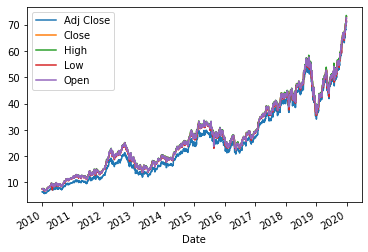

In [9]:
(raw
 .iloc[:, :-2:2]
 .pipe(fix_cols)
 .plot()
)

<AxesSubplot:xlabel='Date'>

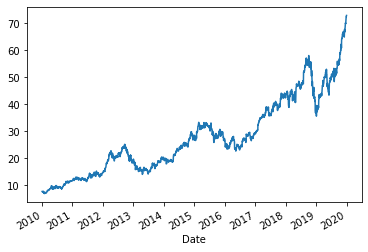

In [17]:
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .Close
 .plot()
)

<AxesSubplot:xlabel='Date'>

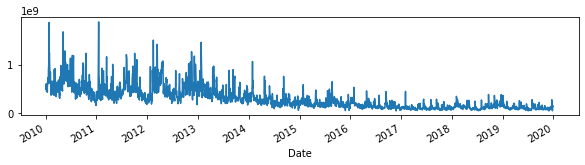

In [18]:
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .Volume
 .plot(figsize=(10, 2))
)

# Resampling

<AxesSubplot:xlabel='Date'>

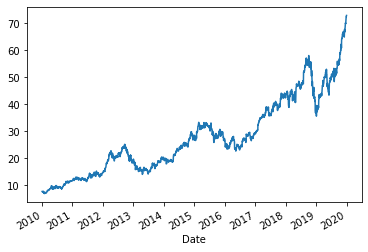

In [19]:
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .Close
 .plot()
)

In [20]:
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .Close
)

Date
2010-01-04     7.643214
2010-01-05     7.656429
2010-01-06     7.534643
2010-01-07     7.520714
2010-01-08     7.570714
                ...    
2019-12-23    71.000000
2019-12-24    71.067497
2019-12-26    72.477501
2019-12-27    72.449997
2019-12-30    72.879997
Name: Close, Length: 2515, dtype: float64

In [23]:
# use resample to change granularity

(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .resample('M') # offset alias
 .Close
)

In [28]:
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .resample('M') # offset alias
 .Close
 .mean()
)

Date
2010-01-31     7.418402
2010-02-28     7.099850
2010-03-31     7.978960
2010-04-30     8.969592
2010-05-31     8.980768
                ...    
2019-08-31    51.239432
2019-09-30    54.498750
2019-10-31    58.821630
2019-11-30    65.630126
2019-12-31    68.917374
Freq: M, Name: Close, Length: 120, dtype: float64

<AxesSubplot:xlabel='Date'>

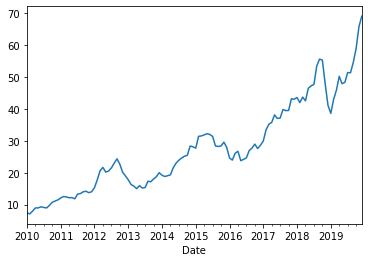

In [31]:
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .resample('M') # offset alias
 .Close
 .mean()
 .plot()
)